# Users Segmentation Analysis / Potential Customers Administrative and invoicing cloud-based software 
# Análisis de segmentación de usuarios / Potenciales clientes Software administrativo y de facturación

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans


In [83]:
df_raw = pd.read_excel(r'C:\Users\WAKU\Documents\ANTONIO_BOZA\DATA_WAKU\PLAN DE NEGOCIOS\DATA ENCUESTAS TLF 24-01-2020\matrizbooleans1.xlsx')

In [84]:
df_raw

,CONTRIBUYENTE,PREGUNTA_3,PREGUNTA_4,PREGUNTA_5,PREGUNTA_6
0,1,1,1,1,1
1,2,0,1,0,1
2,3,1,0,1,1
3,4,1,1,1,1
4,5,0,1,1,1
...,...,...,...,...,...
77,78,0,1,0,0
78,79,0,1,1,1
79,80,0,1,0,0
80,81,0,0,1,1


In [85]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
CONTRIBUYENTE    82 non-null int64
PREGUNTA_3       82 non-null int64
PREGUNTA_4       82 non-null int64
PREGUNTA_5       82 non-null int64
PREGUNTA_6       82 non-null int64
dtypes: int64(5)
memory usage: 3.3 KB


In [86]:
# Checkpoint
df = df_raw.copy()

In [87]:
# Seleccionamos las columnas (Features) que entrarán en el modelo

In [88]:
samples = df.loc[:,'PREGUNTA_3':'PREGUNTA_6']

In [89]:
samples

,PREGUNTA_3,PREGUNTA_4,PREGUNTA_5,PREGUNTA_6
0,1,1,1,1
1,0,1,0,1
2,1,0,1,1
3,1,1,1,1
4,0,1,1,1
...,...,...,...,...
77,0,1,0,0
78,0,1,1,1
79,0,1,0,0
80,0,0,1,1


In [90]:
# Realizamos un loop para construir gráfico y determinar cantidad optima de "Clústers" por el método del "Elbow".

In [91]:
ks = range(1,6)
inertias = []
for k in ks:
    #Creamos una instancia KMeans con "k" Clusters
    model = KMeans(n_clusters = k)
    #Fit model to samples
    model.fit(samples)
    #Append the inertia to the list of inertias
    inertias.append(model.inertia_)

In [92]:
#Graficamos ks Vs inertias para seleccionar la cantidad óptima de clusters ("Elbow method")

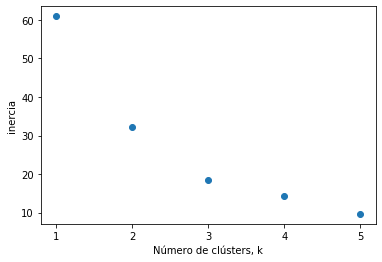

In [93]:
plt.plot(ks,inertias, 'o')
plt.xlabel('Número de clústers, k')
plt.ylabel('inercia')
plt.xticks(ks)
plt.show()

In [94]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)
# preguntas = df.loc[:,'PREGUNTA_3':'PREGUNTA_6']
empresas = df['CONTRIBUYENTE'].to_list()
print(labels)
len(labels)
labels.shape

[1 0 1 1 2 1 2 2 2 0 2 1 1 1 1 2 1 1 1 2 2 2 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0
 0 0 2 1 0 0 0 2 1 1 2 0 1 0 0 0 0 0 0 1 1 1 2 2 1 2 1 1 2 1 0 2 0 1 1 0 1
 0 0 1 0 2 0 2 1]


(82,)

In [95]:
len(empresas)

82

In [96]:
# Aplicamos estandarización de "Features" para hacer más homogéneos los grupos (Clústers)
# In KMeans clustering, the variance of a feature corresponds to its influence 
# *** Feature variance = Feature influence ***
# To give every feature a chance, the data needs to be transformed, so that feature have equal variance. This can be achieved
# with StandardScaler from scikit-learn, which transforms each feature to have mean=0 and variance=1.

# We need to perform two steps:
# StandardScaler / KMeans
# Lets use sklearn "pipeline" to combine multiples steps.

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [98]:
labels2 = pipeline.predict(samples)

In [99]:
print(labels2)

[0 1 2 0 0 0 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 1
 1 1 0 0 1 1 1 0 0 0 2 1 0 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 1 0 1 2 0]


In [100]:
# Creamos un dataframe con las etiquetas y las variables para realizar una Crosstable

In [101]:
df2 = pd.DataFrame({'labels': labels2, 'empresas': empresas})
print(df2.sort_values('labels'))

    labels  empresas
0        0         1
32       0        33
33       0        34
34       0        35
35       0        36
..     ...       ...
8        2         9
80       2        81
2        2         3
56       2        57
47       2        48

[82 rows x 2 columns]


In [102]:
# Verificamos con una "Crosstable" si los 3 Clústers quedaron bien definidos

In [103]:
ct = pd.crosstab(df2['empresas'], df2['labels'])
print(ct)

labels    0  1  2
empresas         
1         1  0  0
2         0  1  0
3         0  0  1
4         1  0  0
5         1  0  0
...      .. .. ..
78        0  1  0
79        1  0  0
80        0  1  0
81        0  0  1
82        1  0  0

[82 rows x 3 columns]


In [104]:
# Check the density of cluster distribution

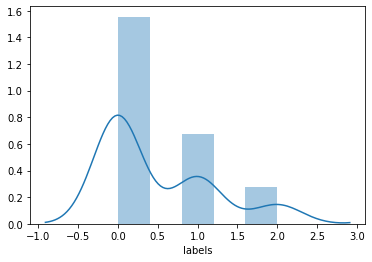

In [105]:
sns.distplot(df2['labels'])

In [106]:
# Let's try to calculate cluster distribution using the Hierarchical Clustering from SciPy

In [107]:
from scipy.cluster.hierarchy import linkage, dendrogram

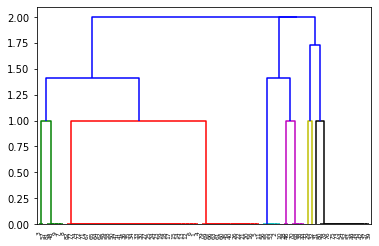

In [108]:
# Distance between clusters is defined by a "linkage method".
# In "complete" linkage distance between clusters is the max distance between their samples
# There are different linkage methods that give different hierarchical clusterings

mergings = linkage(samples, method = 'complete')
dendrogram(mergings, labels = empresas, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

In [109]:
# Let's extract the cluster labels using the "fcluster" method, which returns a NumPy array of them.

In [110]:
from scipy.cluster.hierarchy import fcluster

In [111]:
labels3 = fcluster(mergings, 1.75, criterion='distance')
print(labels3)

[1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 3 3 1 1 1 1 3
 2 3 1 1 3 3 2 1 2 1 1 3 1 3 3 2 3 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 3 1
 3 3 1 3 1 3 1 1]


In [112]:
# Plot the crosstable

In [113]:
ct = pd.crosstab(df2['empresas'], df2['labels'])
print(ct)

labels    0  1  2
empresas         
1         1  0  0
2         0  1  0
3         0  0  1
4         1  0  0
5         1  0  0
...      .. .. ..
78        0  1  0
79        1  0  0
80        0  1  0
81        0  0  1
82        1  0  0

[82 rows x 3 columns]


In [114]:
# Backing up dataframe to Excel

In [115]:
# df2.to_excel('analisis_python.xlsx')

In [116]:
# Applying dimension reduction with Principal Componentes Analysis (PCA).
# The idea behind this method is to find out the intrinsic dimension of a multi-feature dataset, so that its dimension
# can be reduced.

In [117]:
from sklearn.decomposition import PCA

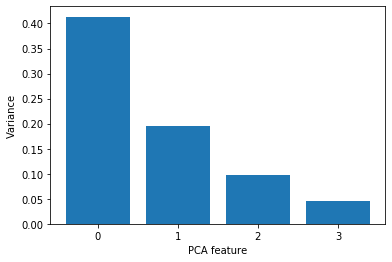

In [118]:
pca = PCA()
pca.fit(samples)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('Variance')
plt.xlabel('PCA feature')
plt.show()

In [119]:
# From the above Graph we can say that only feature "0" and "1" have significance high variance, so the intrinsic dimension
# of this dataset is 2.
# PCA features are in decreasing order of variance
# Assumes the low variance features are "noise" and High variance features are "informative"

In [120]:
print(pca.n_components_)

4
